In [1]:
import pandas as pd
import openpyxl
import numpy as np
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist
import copy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [8]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [9]:
df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()


Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [19]:
print(X_train)

[[1.371e+01 1.860e+00 2.360e+00 ... 1.110e+00 4.000e+00 1.035e+03]
 [1.222e+01 1.290e+00 1.940e+00 ... 8.600e-01 3.020e+00 3.120e+02]
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]


In [ ]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,
                                                   random_state=0,
                                                     n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [15]:
for f in range(X_train.shape[1]):
    print("{:.2g}) {:<40} {}".format(f+1,feat_labels[indices[f]],importances[indices[f]]))

1) Color intensity                          0.18248261633081447
2) Proline                                  0.15860977439208598
3) Flavanoids                               0.15094794797803848
4) OD280/OD315 of diluted wines             0.13198679742764774
5) Alcohol                                  0.1065890612251934
6) Hue                                      0.07824278809689261
7) Total phenols                            0.060717598651490616
8) Alcalinity of ash                        0.032033191209174174
9) Malic acid                               0.025399678325383392
10) Proanthocyanins                          0.022351122470445416
11) Magnesium                                0.02207807404077184
12) Nonflavanoid phenols                     0.014645160876579336
13) Ash                                      0.013916188975481122


In [2]:
basepath="/Users/kazuki/Documents/Study/test/data/ryukyu4/{}"
rflocate = basepath.format("parameter/locations.xlsx")
rfword   = basepath.format("parameter/sheetlist.xlsx")
rfpattern= basepath.format("gram3/pattern/all.xlsx")
picpath="/Users/kazuki/Documents/Study/test/data/ryukyu4/pic/{}"
gnumber=3

In [3]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
wordDf  = pd.read_excel(rfword , sheet_name=0, header=0, index_col=0)

In [4]:
symbols=list(locateDf.iloc[:,0])
locates = list(locateDf.iloc[:,2])
hyouzi = list(locateDf.iloc[:,1])
words   = list(wordDf.iloc[:,0])

In [ ]:
ptDf=pd.read_excel(rfpattern, sheet_name=0, header=0, index_col=0)

In [ ]:
len(ptDf.index.str.contains('-9'))

In [ ]:
nonind=ptDf.index.str.contains('-9')
ptDf.loc[~nonind,:]
ptDf=ptDf.T
distanceMatrix=np.array(ptDf.values)

In [ ]:
len(ptDf.index.str.contains('-9'))

In [26]:
#図の生成
figtitle='Dendrogram for misalignment of sound between regions'
himethod='ward'
# savefile=basepath.format("gramTri/pic/dendAD.png")
pdis=dist.pdist(distanceMatrix,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
# plt.savefig(savefile)
# plt.show()
plt.close()

In [27]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.ix[i][0])
        n2 = int(df1.ix[i][1])
        val = df1.ix[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [28]:
labels=get_cluster_by_number(z,6)

/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-

In [29]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


In [30]:
truelabel=[0 for i in locates]

In [31]:
print(truelabel)
print(len(truelabel))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
95


In [32]:
#教師ラベルの作成
for i,loc in enumerate(locates):
    if i >= 93:
        truelabel[i]=5
    elif i>=81 and i < 93:
        truelabel[i]=4
    elif i>=73 and i<81:
        truelabel[i]=3
    elif i>=32 and i<73:
        truelabel[i]=2
    elif i>=16 and i<32:
        truelabel[i]=1
    elif i>=0 and i<16:
        truelabel[i]=0

In [33]:
print(truelabel)
print(len(truelabel))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]
95


# ラベルの一致

In [35]:
truelabels2=[0 for i in locates]
asignlabels=[0 for i in range(6)]
locindex=[0,16,32,73,81,93,95]
for i in range(6):
    a=i
    b=labels[locindex[i]:locindex[i+1]]
#     print(b)
    labels_unique=sorted(list(set(b)))
#     print(labels_unique)
    label_c=[0 for j in labels_unique]
    for j,jc in enumerate(labels_unique):
        label_c[j]=b.count(jc)
    souwa=sum(label_c)
    for j,jc in enumerate(labels_unique):
        label_c[j]=label_c[j]/sum(label_c)
#     print(label_c)
    asignlabels[i]=labels_unique[label_c.index(max(label_c))]
#     print(asignlabels)
for i in range(len(locates)):
    truelabels2[i]=asignlabels.index(labels[i])

In [36]:
print(truelabels2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


In [42]:
feat_labels = ptDf.columns
forestvalues=ptDf.values
forest = RandomForestClassifier(n_estimators=10000,
                                                   random_state=0,
                                                     n_jobs=-1)
forest.fit(forestvalues, truelabels2)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [43]:
for f in range(forestvalues.shape[1]):
    print("{:.2g}) {:<40} {}".format(f+1,feat_labels[indices[f]],importances[indices[f]]))

1) tx i: t->t i: ts2                        0.002794530064990782
2) -v n i:->-v n i                          0.002337912825179513
3) tx i2 ts2->t i: ts2                      0.002231134346296625
4) n i <e>->n i <e>                         0.002173033719688162
5) ts y ts->t i: ts2                        0.002163912571271706
6) tx i2 t->t i: ts2                        0.0021623162099480187
7) t u ts->t i: ts2                         0.00214252388467928
8) <b> -9 -9-><b> -9 -9                     0.002135359054129282
9) t i: dz->t i: ts2                        0.002060654117204849
10) tx i: ts2->t i: ts2                      0.002001102982372519
11) -v n i->-v n i                           0.0019716411099357477
12) t i ts2->t i: ts2                        0.001964979078292574
13) t i: ts->t i: ts2                        0.0019555276729550848
14) i n i->-v n i                            0.001951151269700884
15) t i2: ts->t i: ts2                       0.0019475604838917143
16) i r a->-9 -9

2.1e+03) <b> h u-><b> w u                         0.0001007397229220542
2.1e+03) i s a->i s2 a                            0.00010068014264976721
2.1e+03) k i n->ts2 i n2                          0.00010050196766024923
2.1e+03) s u -c->th u -c                          0.00010046307152805734
2.1e+03) y: g y->-9 -9 -9                         0.00010035340304720961
2.1e+03) -c o s2->-9 -9 -9                        0.00010032979779249889
2.1e+03) n2 -v n->-9 -9 -9                        0.00010028145725812307
2.1e+03) ts2 i n->ts2 i n2                        0.0001002508013861042
2.1e+03) p o -c->-9 -9 -9                         0.0001001143868148711
2.1e+03) <b> -c a-><b> b a                        9.986032102296629e-05
2.1e+03) <b> p i-><b> b i                         9.980251901809993e-05
2.1e+03) i n i2:->-9 -9 -9                        9.971943656472092e-05
2.1e+03) <b> px i:-><b> -9 -9                     9.970963493408742e-05
2.1e+03) m i2 dz->-9 -9 -9                        9.970213

4.1e+03) y n u->y n2 -v                           2.773066700670051e-05
4.1e+03) u s y->u s y                             2.771667859203756e-05
4.1e+03) <b> -c -v-><b> m u                       2.7703765450411415e-05
4.1e+03) l -v <e>->-9 -9 <e>                      2.770131340977125e-05
4.1e+03) a: -c i->a: -c i                         2.7700825088260273e-05
4.1e+03) o: -c o:->-9 -9 -9                       2.7691274116778297e-05
4.1e+03) k y n2->-9 -9 -9                         2.7680757883284758e-05
4.1e+03) u r a->u r a                             2.7666918949697383e-05
4.1e+03) a m i:->-9 -9 -9                         2.7663535738267614e-05
4.1e+03) -v f a->-v -c a                          2.7654915641222365e-05
4.1e+03) h a k->hj a k                            2.7653010194062795e-05
4.1e+03) j i k->b i k                             2.764941250686244e-05
4.1e+03) hw u m->n2 -v m                          2.7637304063293644e-05
4.1e+03) <b> s -v-><b> p y                        2.762

6.1e+03) h a dz->h a dz2                          1.1753293188526287e-05
6.1e+03) -9 -9 -9->i d a                          1.174814333299763e-05
6.1e+03) <b> kx u-><b> k u:                       1.1733622247108633e-05
6.1e+03) -c -v s2->-9 -9 -9                       1.1732276490165678e-05
6.1e+03) q -v ts2->q -v ts2                       1.1729014343485796e-05
6.1e+03) <b> s y-><b> ts2x i                      1.1719036905625233e-05
6.1e+03) u m o:->u m o:                           1.1710230404248507e-05
6.1e+03) -v t i2:->-v t i2:                       1.1707573030553484e-05
6.1e+03) n2 -v n->ts2 i n                         1.1700702010586237e-05
6.1e+03) n i: s->-9 -9 -9                         1.1698952090702299e-05
6.1e+03) kh i b->k u b                            1.1698704449504679e-05
6.1e+03) h i: r->-9 -9 -9                         1.1693622293034554e-05
6.1e+03) kh u -c->hw u -c                         1.1691936165189427e-05
6.1e+03) h a dz->kh a d                           1.

8.1e+03) aq ts i2->-9 -9 -9                       5.614327739406096e-06
8.1e+03) <b> dz2 o-><b> dz o                      5.614307931570763e-06
8.1e+03) ph i r->-9 -9 -9                         5.613302475415945e-06
8.1e+03) -c u g->-c u: dz2                        5.61253329564068e-06
8.1e+03) i g i->u -c i                            5.609568695024894e-06
8.1e+03) i dz2 i:->i dz u                         5.608759825627296e-06
8.1e+03) u s2 i->u s2 i:                          5.608256756381618e-06
8.1e+03) -c i n2->? u n                           5.607314088683677e-06
8.1e+03) -9 -9 -9->kwx e: -c                      5.605296559294707e-06
8.1e+03) -9 -9 -9->th i r                         5.605208419787541e-06
8.1e+03) <b> n2 -v-><b> n i                       5.6039758734091365e-06
8.1e+03) g u k->? u: k                            5.603244898965533e-06
8.1e+03) u -c u->i r u                            5.603043364337036e-06
8.1e+03) ts2 i n2->s2 i n2                        5.602194173740

1e+04) kh u m->k u: m                           2.8291491706125865e-06
1e+04) ? u n->h! u n                            2.8291060170254786e-06
1e+04) u ts2 -v->u ts y                         2.8282858354979652e-06
1e+04) a d i->a r i                             2.828244274809158e-06
1e+04) i r i2->i b i                            2.828243221655846e-06
1e+04) w i2 -c->w u -c                          2.8281844138621647e-06
1e+04) ts2 i n->tsx u: n                        2.828122452740588e-06
1e+04) n i: g->n i g                            2.828122452740588e-06
1e+04) <b> ts2x i-><b> ts i2                    2.827871902364e-06
1e+04) -9 -9 -9->dz2 i r                        2.827544583433237e-06
1e+04) a ng -v->a -c i                          2.8275212064090492e-06
1e+04) u: m u:->u m o:                          2.8273809523809532e-06
1e+04) s2 i: n->k y n2                          2.8273809523809515e-06
1e+04) i2 d a:->i2 d a                          2.8273809523809515e-06
1e+04) ts2x i n

1.2e+04) ?n2 -v dz2->n2 -v dz2                    2.215485074626866e-06
1.2e+04) -c u s2->b u h                           2.215226769266643e-06
1.2e+04) p i s->hw i s                            2.2138071657442467e-06
1.2e+04) ts2x i: <e>->dz y: <e>                   2.2134203168685928e-06
1.2e+04) <b> w i-><b> w i                         2.2120459484632105e-06
1.2e+04) -v n a:->-9 -9 -9                        2.2118742724097782e-06
1.2e+04) -c -v tx->-c u ts                        2.2113594040968343e-06
1.2e+04) u t u:->u: t u                           2.209944751381215e-06
1.2e+04) e h e2->i hj i                           2.2086602731764017e-06
1.2e+04) <b> ph i:-><b> hw i:                     2.205882352941177e-06
1.2e+04) m i: dz2->n i dz2                        2.205882352941177e-06
1.2e+04) j i d->d u d                             2.204517326732673e-06
1.2e+04) <b> w i:-><b> w u                        2.204517326732673e-06
1.2e+04) t i2 r->t i: d                           2.201112

1.4e+04) <b> ts y:-><b> ts y:                     0.0
1.4e+04) <b> ts y:-><b> ts i2                     0.0
1.4e+04) <b> ts y:-><b> t u                       0.0
1.4e+04) tx i2: ts->t u ts                        0.0
1.4e+04) <b> ts y:-><b> s y:                      0.0
1.4e+04) <b> ts y:-><b> k y                       0.0
1.4e+04) <b> ts y:-><b> dz y:                     0.0
1.4e+04) <b> w e2-><b> h u                        0.0
1.4e+04) <b> ts y:-><b> dz y                      0.0
1.4e+04) tx u r->tx i2 r                          0.0
1.4e+04) <b> ts y-><b> tx u                       0.0
1.4e+04) <b> ts y-><b> tx i2                      0.0
1.4e+04) <b> ts y-><b> tx i                       0.0
1.4e+04) <b> ts y-><b> tsx u:                     0.0
1.4e+04) <b> w e2-><b> h u:                       0.0
1.4e+04) <b> w e2-><b> hw u:                      0.0
1.4e+04) <b> ts y-><b> tsx i2                     0.0
1.4e+04) <b> w e2-><b> w e2                       0.0
1.4e+04) <b> ts y-><b> tsh i

1.6e+04) -c u dz2->-c o t                         0.0
1.6e+04) -c u dz2->-c o dz2                       0.0
1.6e+04) w a n->-c a n2                           0.0
1.6e+04) -c u dz2->-c -v ts2                      0.0
1.6e+04) -c u dz2->-c -v s2                       0.0
1.6e+04) -c u d->-c u dz2                         0.0
1.6e+04) -c u d->-c u d                           0.0
1.6e+04) -c u d->-9 -9 -9                         0.0
1.6e+04) w a n->gw a n2                           0.0
1.6e+04) -c u <e>->r u <e>                        0.0
1.6e+04) -c u <e>->n2 -v <e>                      0.0
1.6e+04) -c u <e>->m u <e>                        0.0
1.6e+04) w a n2->-9 -9 -9                         0.0
1.6e+04) w a n2->-c a n2                          0.0
1.6e+04) w a n2->b a n2                           0.0
1.6e+04) -c u <e>->b u <e>                        0.0
1.6e+04) -c u <e>->b o: <e>                       0.0
1.6e+04) -c u <e>->b o <e>                        0.0
1.6e+04) w a n2->w a n      

1.8e+04) <b> dz2 u:-><b> r u                      0.0
1.8e+04) u r y->u s2 -v                           0.0
1.8e+04) <b> dz2 u:-><b> dz i2                    0.0
1.8e+04) <b> dz2 u:-><b> d u                      0.0
1.8e+04) <b> dz2 u:-><b> d i2                     0.0
1.8e+04) <b> dz2 u:-><b> -9 -9                    0.0
1.8e+04) <b> dz2 u-><b> t u                       0.0
1.8e+04) <b> dz2 u-><b> r u                       0.0
1.8e+04) <b> dz2 u-><b> dz2 y:                    0.0
1.8e+04) <b> dz2 u-><b> dz2 u:                    0.0
1.8e+04) <b> dz2 u-><b> dz2 u                     0.0
1.8e+04) <b> dz2 u-><b> dz2 o                     0.0
1.8e+04) <b> dz2 u-><b> dz2 i:                    0.0
1.8e+04) <b> dz2 u-><b> dz2 i                     0.0
1.8e+04) <b> dz2 u-><b> dz y                      0.0
1.8e+04) <b> dz2 u-><b> dz u:                     0.0
1.8e+04) <b> dz2 u-><b> dz u                      0.0
1.8e+04) <b> dz2 u-><b> dz i2                     0.0
1.8e+04) <b> dz2 u-><b> d u 

2e+04) s2 i n->t i2 r                           0.0
2e+04) k u b->kh u b                            0.0
2e+04) k u j->h u -c                            0.0
2e+04) k u b->kh u d                            0.0
2e+04) k u b->kh u p                            0.0
2e+04) k u b->kj u -c                           0.0
2e+04) k u b->kx i b                            0.0
2e+04) k u b->kx u -c                           0.0
2e+04) s2 i n->t i t                            0.0
2e+04) k u b->k i p                             0.0
2e+04) k u b->k i n2                            0.0
2e+04) k u b->k i h                             0.0
2e+04) k u b->k i f                             0.0
2e+04) s2 i n->th e2 d                          0.0
2e+04) s2 i n->th i r                           0.0
2e+04) s2 i n->th i2 r                          0.0
2e+04) k u <e>->k -v <e>                        0.0
2e+04) k u <e>->h u <e>                         0.0
2e+04) k u <e>->g u <e>                         0.0
2e+04) k u -

2.2e+04) pjx a: k->h e k                          0.0
2.2e+04) n u d->n i b                             0.0
2.2e+04) pjx a: k->hw a: k                        0.0
2.2e+04) n u d->n u d                             0.0
2.2e+04) n u d->n u p                             0.0
2.2e+04) n u d->n u: b                            0.0
2.2e+04) n u n2->n u n2                           0.0
2.2e+04) n u p->n i b                             0.0
2.2e+04) n o: <e>->n un <e>                       0.0
2.2e+04) n u p->n u d                             0.0
2.2e+04) n u p->n u p                             0.0
2.2e+04) n u p->n u: b                            0.0
2.2e+04) n u: -c->n i -c                          0.0
2.2e+04) n u: -c->n u -c                          0.0
2.2e+04) n u: -c->n u: -c                         0.0
2.2e+04) pjx a: k->p e: k                         0.0
2.2e+04) n u b->n u p                             0.0
2.2e+04) n u b->n u d                             0.0
2.2e+04) pjx a: k->pj a: g  

2.4e+04) d a: ts2->d a: ts2                       0.0
2.4e+04) d a: <e>->t a <e>                        0.0
2.4e+04) ts2 i n->k i n2                          0.0
2.4e+04) b u s->n2 -v s2                          0.0
2.4e+04) b u s->h u -c                            0.0
2.4e+04) b u s->f -v -c                           0.0
2.4e+04) b i s2->w o: s2                          0.0
2.4e+04) b i s2->h u -c                           0.0
2.4e+04) b i s2->n2 -v s2                         0.0
2.4e+04) b i s2->p u s                            0.0
2.4e+04) b i s2->v -v -c                          0.0
2.4e+04) b i s2->v -v s                           0.0
2.4e+04) b i s2->w i -c                           0.0
2.4e+04) b i: -c->-9 -9 -9                        0.0
2.4e+04) ts2 in d->s2 i n                         0.0
2.4e+04) b i: -c->-c i h                          0.0
2.4e+04) b i: -c->? i k                           0.0
2.4e+04) b i: -c->? u k                           0.0
2.4e+04) ts2 in d->-9 -9 -9 

2.7e+04) hj i k->j i: -c                          0.0
2.7e+04) hj i k->j i h                            0.0
2.7e+04) hj i s->p i s                            0.0
2.7e+04) hj i s->s -v s                           0.0
2.7e+04) hw -v hw->kwh e: -c                      0.0
2.7e+04) hw -v -c->f -v -c                        0.0
2.7e+04) hj u s->hj i s2                          0.0
2.7e+04) hj u s->hw i s                           0.0
2.7e+04) hj u s->p i s                            0.0
2.7e+04) hj u s->pjh a: -c                        0.0
2.7e+04) hj u s->s -v s                           0.0
2.7e+04) th i r->t i r                            0.0
2.7e+04) hw -v -c->hw -v -c                       0.0
2.7e+04) th i r->th i: d                          0.0
2.7e+04) hw -v -c->kx -v -c                       0.0
2.7e+04) hw -v hw->-c -v -c                       0.0
2.7e+04) th i d->ts2 i d                          0.0
2.7e+04) hw -v hw->hw -v hw                       0.0
2.7e+04) hw -v hw->k e: -c  

In [49]:
print(importances[indices[0:11]])

[0.00279453 0.00233791 0.00223113 0.00217303 0.00216391 0.00216232
 0.00214252 0.00213536 0.00206065 0.0020011  0.00197164]


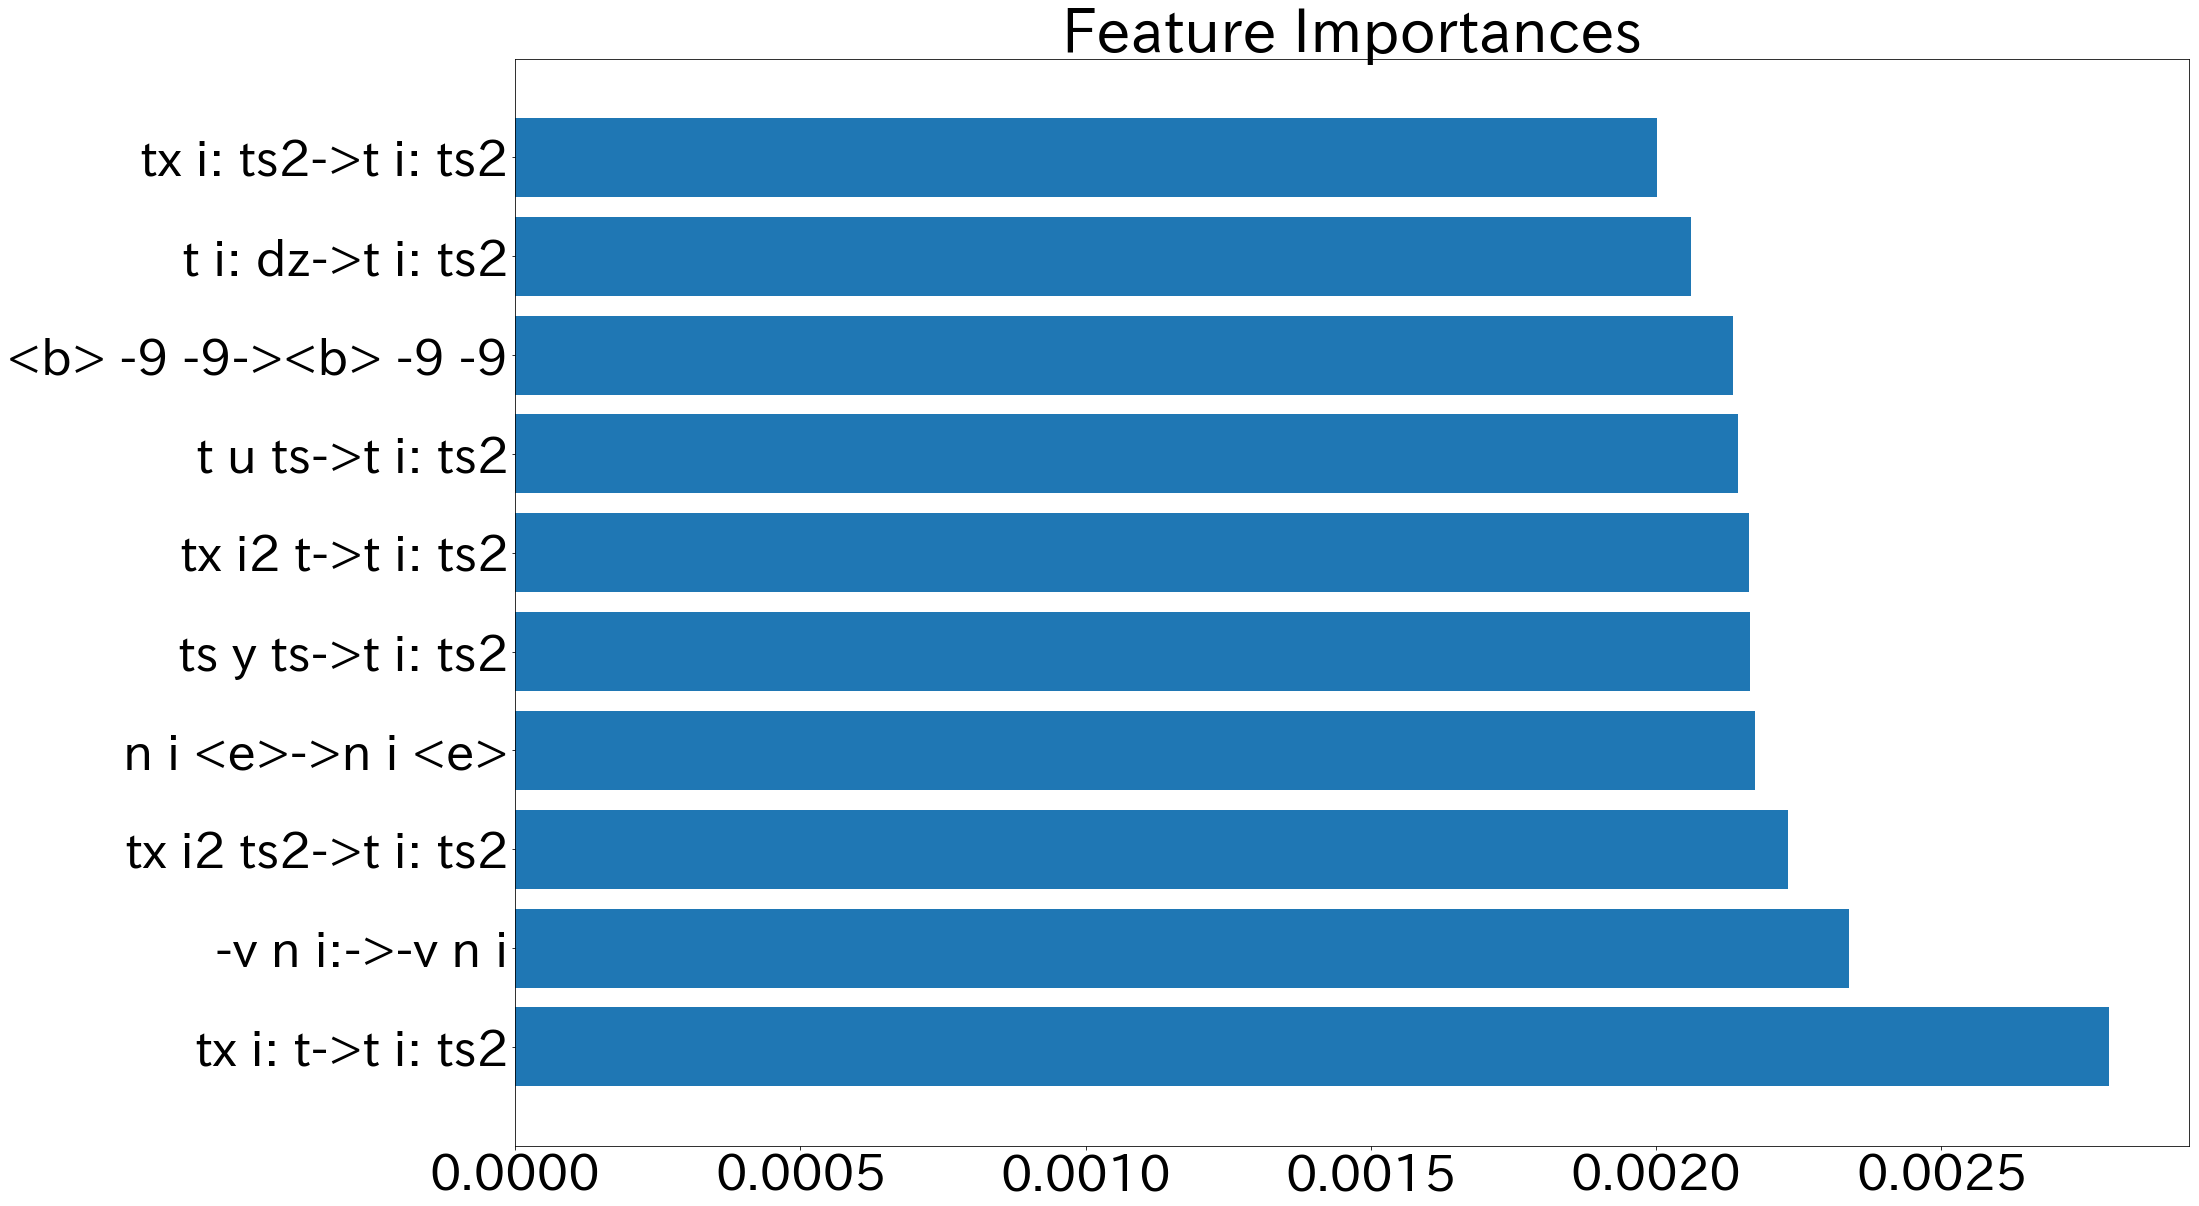

In [65]:
plt.figure(figsize=(30,20))
plt.title('Feature Importances')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.rcParams['lines.linewidth'] = 4
plt.barh(list(range(10)),importances[indices[0:10]])
plt.yticks(range(10),
            feat_labels[indices[0:10]])
plt.ylim([-1, 10])
# plt.tight_layout()
plt.show()
plt.close()